In [86]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
df = pd.read_csv("breast+cancer+wisconsin+diagnostic.csv")
df

,ID,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  569 non-null    int64  
 1   Diagnosis           569 non-null    object 
 2   radius1             569 non-null    float64
 3   texture1            569 non-null    float64
 4   perimeter1          569 non-null    float64
 5   area1               569 non-null    float64
 6   smoothness1         569 non-null    float64
 7   compactness1        569 non-null    float64
 8   concavity1          569 non-null    float64
 9   concave_points1     569 non-null    float64
 10  symmetry1           569 non-null    float64
 11  fractal_dimension1  569 non-null    float64
 12  radius2             569 non-null    float64
 13  texture2            569 non-null    float64
 14  perimeter2          569 non-null    float64
 15  area2               569 non-null    float64
 16  smoothne

In [89]:
df.columns

Index(['ID', 'Diagnosis', 'radius1', 'texture1', 'perimeter1', 'area1',
       'smoothness1', 'compactness1', 'concavity1', 'concave_points1',
       'symmetry1', 'fractal_dimension1', 'radius2', 'texture2', 'perimeter2',
       'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3'],
      dtype='object')

In [90]:
df.describe()

,ID,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [91]:
df.shape

(569, 32)

In [92]:
y = df['Diagnosis']
y

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: Diagnosis, Length: 569, dtype: object

In [93]:
a = df.drop(['ID','Diagnosis'], axis=1)
a

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [94]:
x=y.value_counts()
x.head()

Diagnosis
B    357
M    212
Name: count, dtype: int64

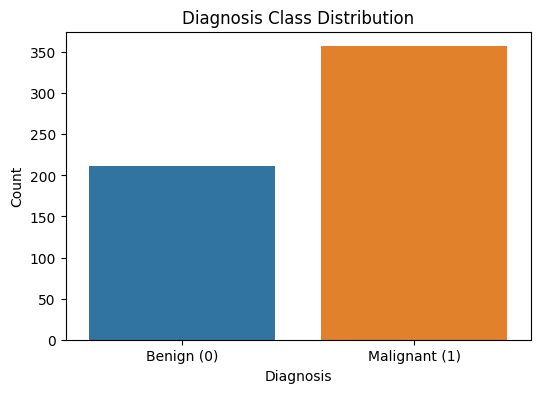

In [95]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Diagnosis', data=df)
plt.xticks([0, 1], ['Benign (0)', 'Malignant (1)'])
plt.title('Diagnosis Class Distribution')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

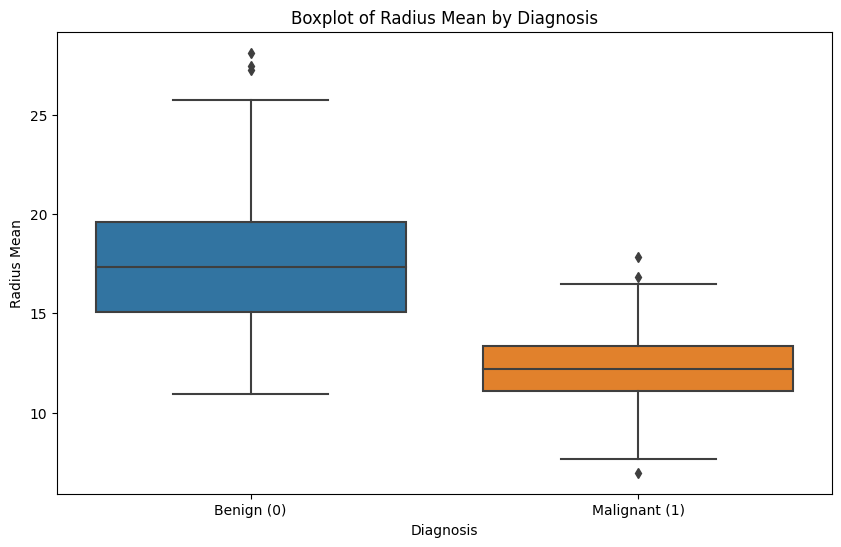

In [96]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Diagnosis', y='radius1', data=df)
plt.xticks([0, 1], ['Benign (0)', 'Malignant (1)'])
plt.title('Boxplot of Radius Mean by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Radius Mean')
plt.show()

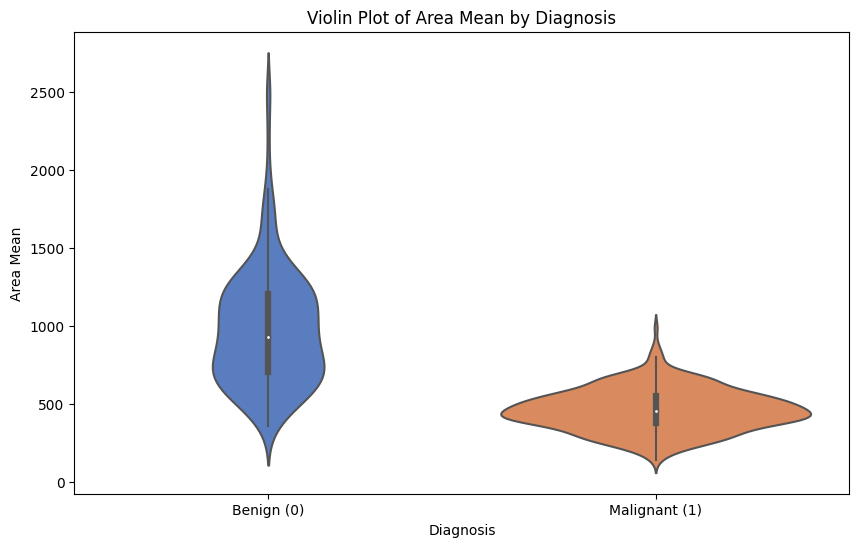

In [97]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Diagnosis', y='area1', data=df, palette='muted')
plt.xticks([0, 1], ['Benign (0)', 'Malignant (1)'])
plt.title('Violin Plot of Area Mean by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Area Mean')
plt.show()

C:\Users\Gargi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


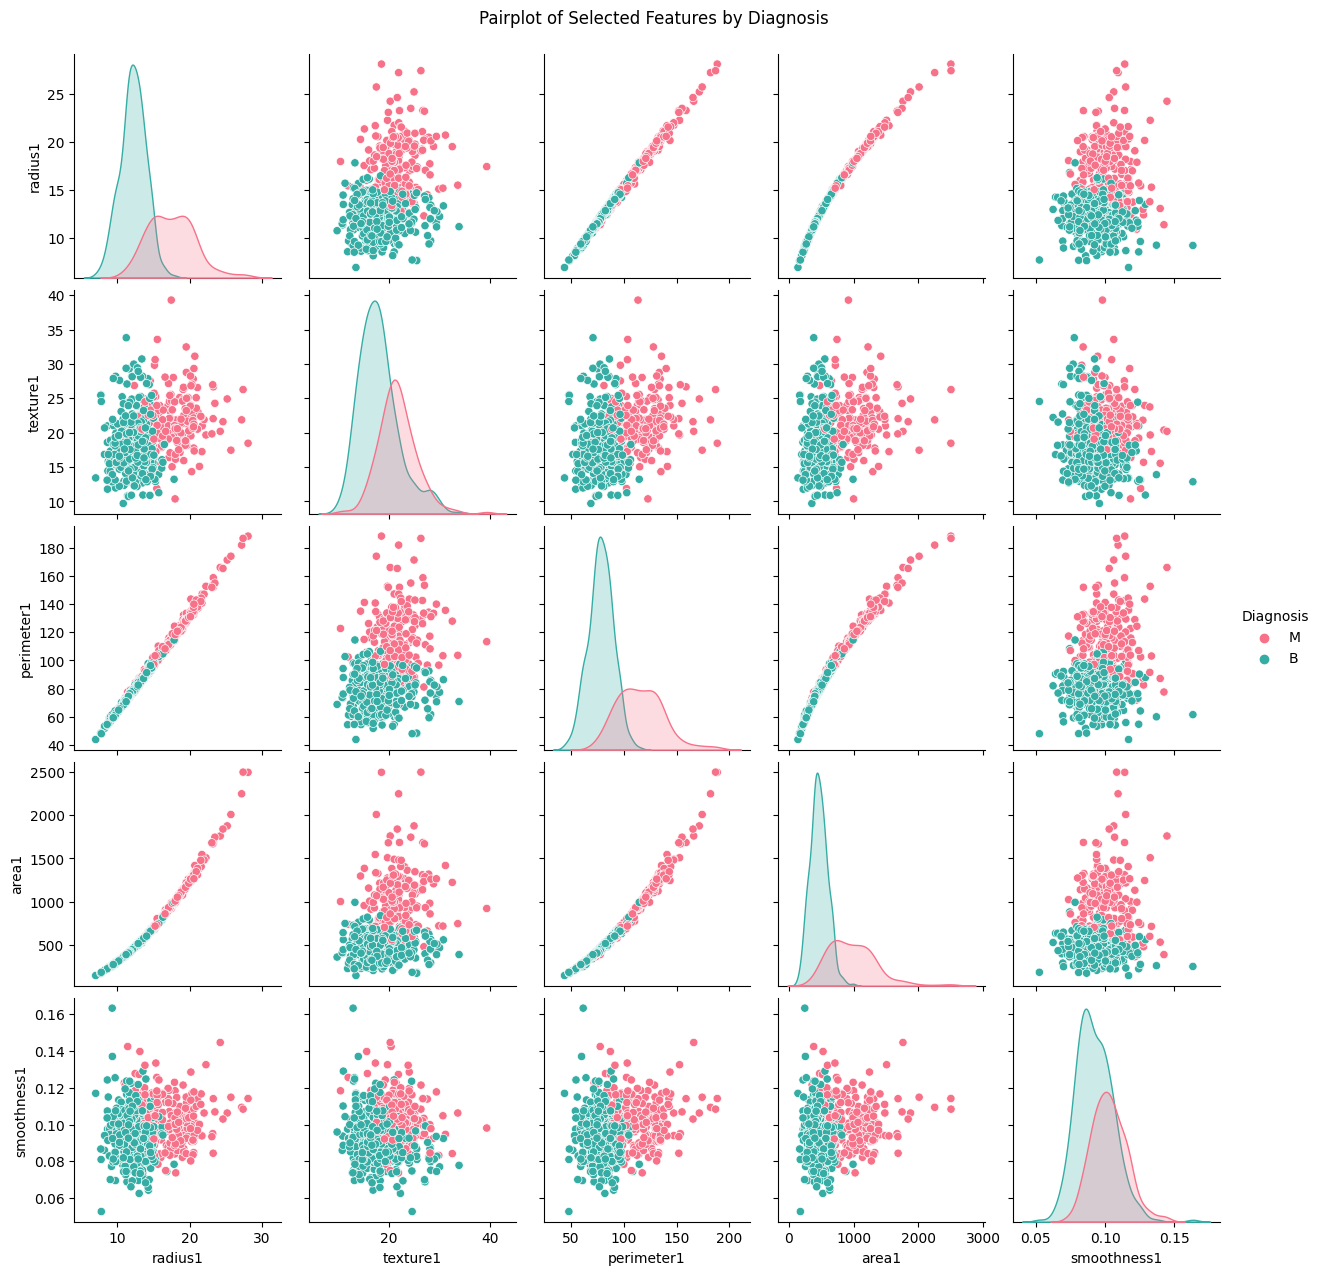

In [108]:
selected_features = ['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1']
sns.pairplot(df[selected_features + ['Diagnosis']], hue='Diagnosis', palette='husl', diag_kind='kde')
plt.suptitle('Pairplot of Selected Features by Diagnosis', y=1.02)
plt.show();

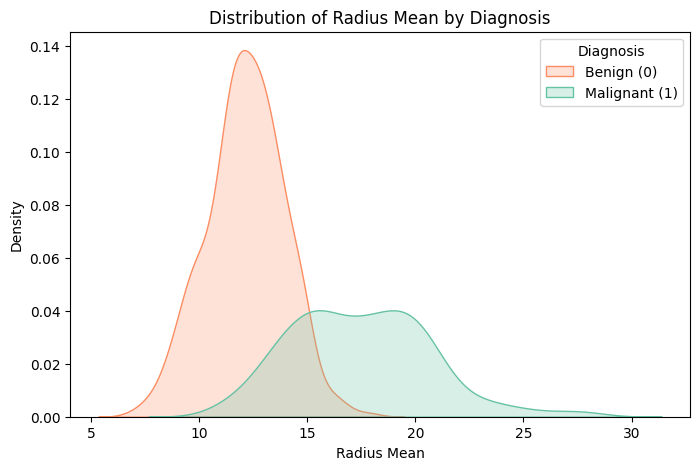

In [99]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x='radius1', hue='Diagnosis', fill=True, palette='Set2')
plt.title('Distribution of Radius Mean by Diagnosis')
plt.xlabel('Radius Mean')
plt.ylabel('Density')
plt.legend(title='Diagnosis', labels=['Benign (0)', 'Malignant (1)'])
plt.show()

In [100]:
df_numeric = df.select_dtypes(include=[np.number])

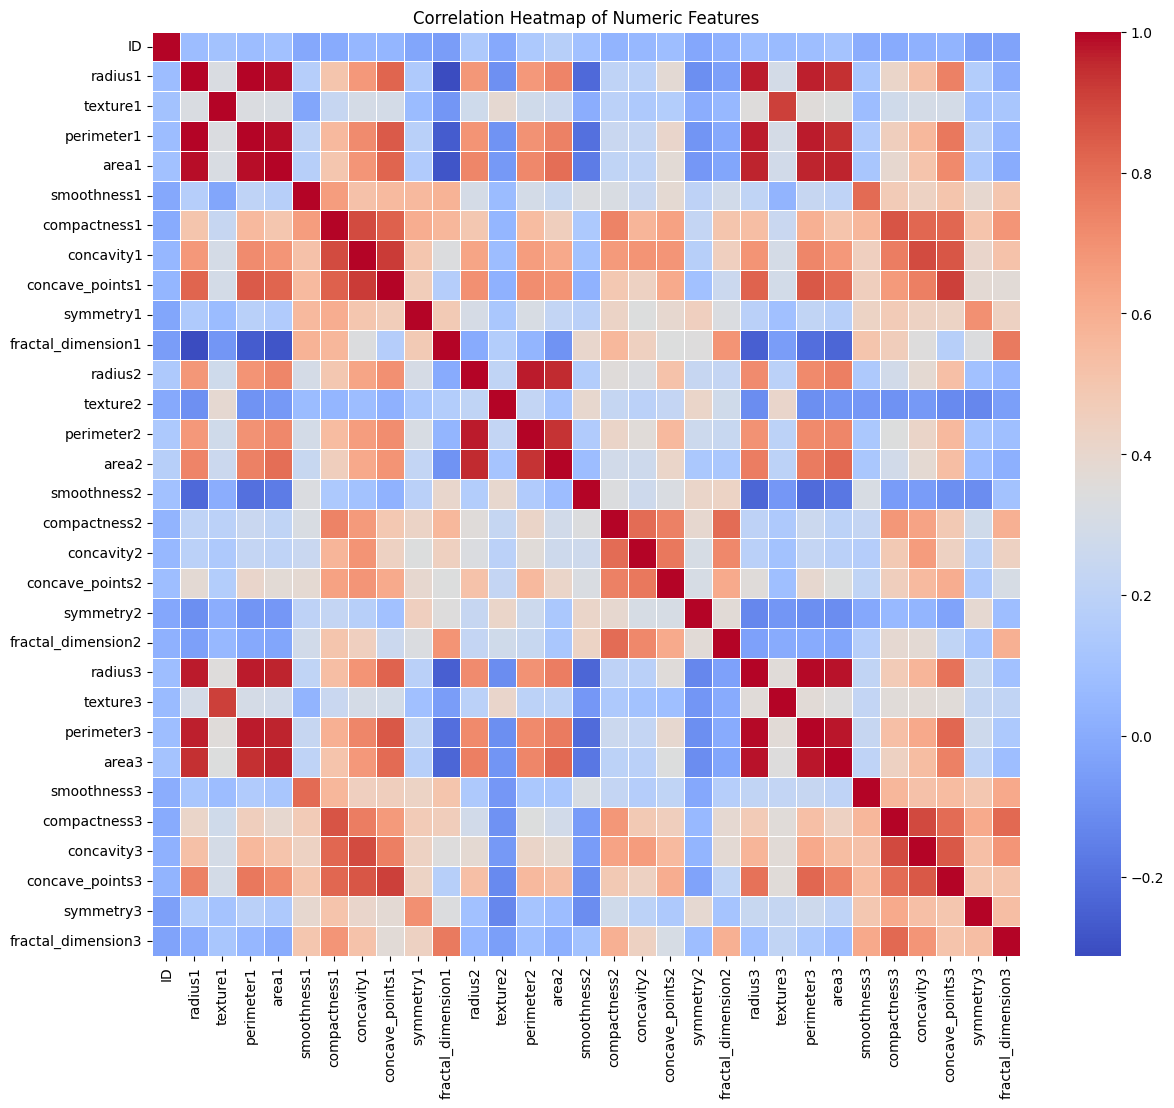

In [101]:
plt.figure(figsize=(14, 12))
correlation_matrix = df_numeric.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

In [102]:
import sklearn.datasets

In [103]:
breast_cancer=sklearn.datasets.load_breast_cancer()

In [104]:
X=breast_cancer.data
Y=breast_cancer.target

In [105]:
print(X.shape,Y.shape)

(569, 30) (569,)


In [106]:
data=pd.DataFrame(breast_cancer.data,columns=breast_cancer.feature_names)

In [107]:
data['class']=breast_cancer.target

In [51]:
print(data['class'].value_counts())

class
1    357
0    212
Name: count, dtype: int64


In [52]:
print(breast_cancer.target_names)

['malignant' 'benign']


In [53]:
data.groupby('class').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
class,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [54]:
X=data.drop('class',axis=1)
Y=data['class']
type(X)

pandas.core.frame.DataFrame

In [55]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1)
print(X.shape,X_train.shape,X_test.shape)

(569, 30) (512, 30) (57, 30)


In [56]:
print(Y.shape,Y_train.shape,Y_test.shape)

(569,) (512,) (57,)


In [57]:
print(Y.mean(),Y_train.mean(),Y_test.mean())   

0.6274165202108963 0.626953125 0.631578947368421


In [58]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,stratify=Y)

In [59]:
print(X.mean(),X_train.mean(),X_test.mean())   

mean radius                 14.127292
mean texture                19.289649
mean perimeter              91.969033
mean area                  654.889104
mean smoothness              0.096360
mean compactness             0.104341
mean concavity               0.088799
mean concave points          0.048919
mean symmetry                0.181162
mean fractal dimension       0.062798
radius error                 0.405172
texture error                1.216853
perimeter error              2.866059
area error                  40.337079
smoothness error             0.007041
compactness error            0.025478
concavity error              0.031894
concave points error         0.011796
symmetry error               0.020542
fractal dimension error      0.003795
worst radius                16.269190
worst texture               25.677223
worst perimeter            107.261213
worst area                 880.583128
worst smoothness             0.132369
worst compactness            0.254265
worst concav

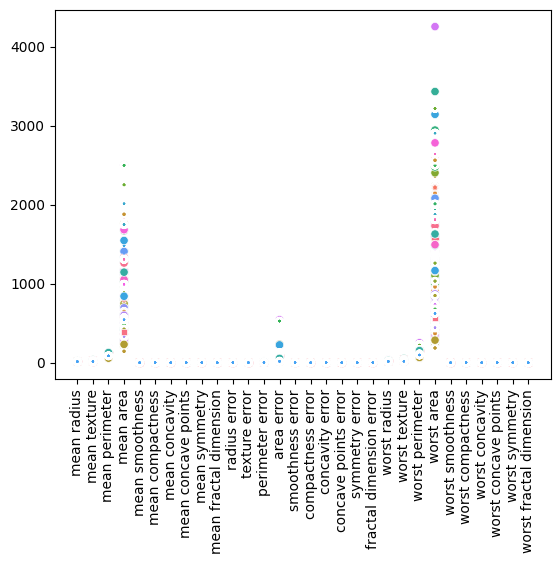

In [60]:
ax=sns.scatterplot(data=X_train.T)
plt.xticks(rotation=90)
ax.legend_.remove()

In [61]:
X_binarized_3_train=X_train['mean area'].map(lambda x:0 if x<1000 else 1)

(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.]),
 [Text(-100.0, 0, '−100'),
  Text(0.0, 0, '0'),
  Text(100.0, 0, '100'),
  Text(200.0, 0, '200'),
  Text(300.0, 0, '300'),
  Text(400.0, 0, '400'),
  Text(500.0, 0, '500'),
  Text(600.0, 0, '600')])

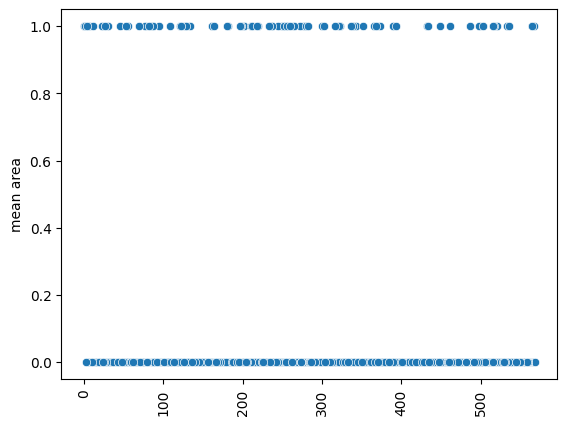

In [63]:
ax1=sns.scatterplot(data=X_binarized_3_train.T)
plt.xticks(rotation=90)

In [64]:
X_binarised_train=X_train.apply(pd.cut,bins=2,labels=[1,0])

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, 'mean radius'),
  Text(1, 0, 'mean texture'),
  Text(2, 0, 'mean perimeter'),
  Text(3, 0, 'mean area'),
  Text(4, 0, 'mean smoothness'),
  Text(5, 0, 'mean compactness'),
  Text(6, 0, 'mean concavity'),
  Text(7, 0, 'mean concave points'),
  Text(8, 0, 'mean symmetry'),
  Text(9, 0, 'mean fractal dimension'),
  Text(10, 0, 'radius error'),
  Text(11, 0, 'texture error'),
  Text(12, 0, 'perimeter error'),
  Text(13, 0, 'area error'),
  Text(14, 0, 'smoothness error'),
  Text(15, 0, 'compactness error'),
  Text(16, 0, 'concavity error'),
  Text(17, 0, 'concave points error'),
  Text(18, 0, 'symmetry error'),
  Text(19, 0, 'fractal dimension error'),
  Text(20, 0, 'worst radius'),
  Text(21, 0, 'worst texture'),
  Text(22, 0, 'worst perimeter'),
  Text(23, 0, 'worst area'),
  Text(24, 0, 'worst smoothness')

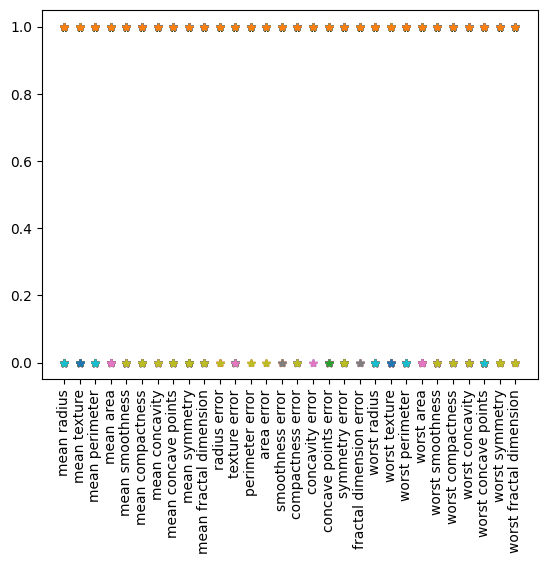

In [65]:
plt.plot(X_binarised_train.T,'*')
plt.xticks(rotation=90)

In [66]:
X_binarized_test=X_test.apply(pd.cut,bins=2,labels=[1,0])

In [67]:
print(type(X_binarized_test))
print(type(X_binarised_train))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [68]:
X_binarised_train=X_binarised_train.values

In [69]:
print(type(X_binarised_train))

<class 'numpy.ndarray'>


In [70]:
print(type(X_binarized_test))

<class 'pandas.core.frame.DataFrame'>


In [71]:
X_binarized_test=X_binarized_test.values

In [72]:
from random import randint

In [75]:
b = 3

i = randint(0, X_binarised_train.shape[0])

print("For row", i)

if (np.sum(X_binarised_train[100, :]) >= b):
    print("MP Neuron inference is malignant")
else:
    print("MP Neuron inference is benign")

if (Y_train[i] == 1):
    print("Ground Truth is malignant")
else:
    print("Ground truth is benign")

For row 334
MP Neuron inference is malignant
Ground Truth is malignant


In [76]:
for b in range(X_binarised_train.shape[1] + 1):
    Y_pred_train = []
    accurate_rows = 0

    for x, y in zip(X_binarised_train, Y_train):
        y_pred = (np.sum(x) >= b)
        Y_pred_train.append(y_pred)
        accurate_rows += (y == y_pred)

    print(b, accurate_rows, accurate_rows/X_binarised_train.shape[0])

0 321 0.626953125
1 321 0.626953125
2 321 0.626953125
3 321 0.626953125
4 321 0.626953125
5 321 0.626953125
6 321 0.626953125
7 321 0.626953125
8 321 0.626953125
9 321 0.626953125
10 321 0.626953125
11 321 0.626953125
12 322 0.62890625
13 322 0.62890625
14 324 0.6328125
15 325 0.634765625
16 329 0.642578125
17 332 0.6484375
18 335 0.654296875
19 337 0.658203125
20 342 0.66796875
21 354 0.69140625
22 362 0.70703125
23 374 0.73046875
24 390 0.76171875
25 408 0.796875
26 423 0.826171875
27 430 0.83984375
28 429 0.837890625
29 415 0.810546875
30 387 0.755859375


In [77]:
b = 28 

Y_pred_test = []

for x in X_binarized_test:
    y_pred = (np.sum(x) >= b)
    Y_pred_test.append(y_pred)
    
accuracy = accuracy_score(Y_pred_test, Y_test)
print(b,accuracy)

28 0.7719298245614035


In [78]:
class MPNeuron:
    
    def __init__(self):
        self.b=None
        
    def model(self,x):
        return(sum(x) >= self.b)
    
    def predict(self,X):
        Y=[]
        for x in X:
            result=self.model(x)
            Y.append(result)
        return np.array(Y)
    
    def fit(self,X,Y):
        accuracy={}
        
        for b in range(X.shape[1] +1):
            self.b=b
            Y_pred=self.predict(X)
            accuracy[b]=accuracy_score(Y_pred,Y)
            
        best_b=max(accuracy,key=accuracy.get)
        self.b=best_b
        
        
        print('optimal value of b is',best_b)
        print('highest acccuracy is',accuracy[best_b])

In [83]:
mp_neuron = MPNeuron()
mp_neuron.fit(X_binarised_train,Y_train)

optimal value of b is 27
highest acccuracy is 0.83984375


In [84]:
Y_test_pred = mp_neuron.predict(X_binarized_test)
accuracy_test = accuracy_score(Y_test_pred, Y_test)

In [85]:
print(accuracy_test)

0.8771929824561403
